In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = {
    'ID': range(1, 21),
    'Nombre': [None, 'Maria', 'Pedro', 'Ana', 'Luis', 'Carlos', 'Maria', 'Pedro', 'Ana', 'Luis', 'Carlos', 'Maria', 'Pedro', 'Ana', 'Luis', 'Carlos', 'Maria', 'Pedro', 'Ana', 'Luis'],
    'Edad': [20, 21, 22, 23, 25, 40, 26, 27, 28, 29, 45, 31, 47, 33, 34, 48, 36, 37, 38, 39],
    'Salario': [5000, 1000, 5000, 41000, 15000, 16000, 17000, 18000, 19000, 10000, 11000, 12000, 13000, 14000, 15000, 15000, 17000, 18000, 28000, 60000],
    'Ciudad': ['Madrid', 'Barcelona', None, 'Sevilla', 'Malaga', 'Cordoba', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Malaga', 'Cordoba', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Malaga', 'Cordoba', 'Madrid', 'Barcelona'],
    'Fecha_Ingreso': ['2020-01-01', None, '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', None, '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20']
}
df = pd.DataFrame(data)
display(df)

,ID,Nombre,Edad,Salario,Ciudad,Fecha_Ingreso
0,1,None,20,5000,Madrid,2020-01-01
1,2,Maria,21,1000,Barcelona,None
2,3,Pedro,22,5000,None,2020-01-03
3,4,Ana,23,41000,Sevilla,2020-01-04
4,5,Luis,25,15000,Malaga,2020-01-05
5,6,Carlos,40,16000,Cordoba,2020-01-06
6,7,Maria,26,17000,Madrid,2020-01-07
7,8,Pedro,27,18000,Barcelona,2020-01-08
8,9,Ana,28,19000,Valencia,2020-01-09
9,10,Luis,29,10000,Sevilla,None


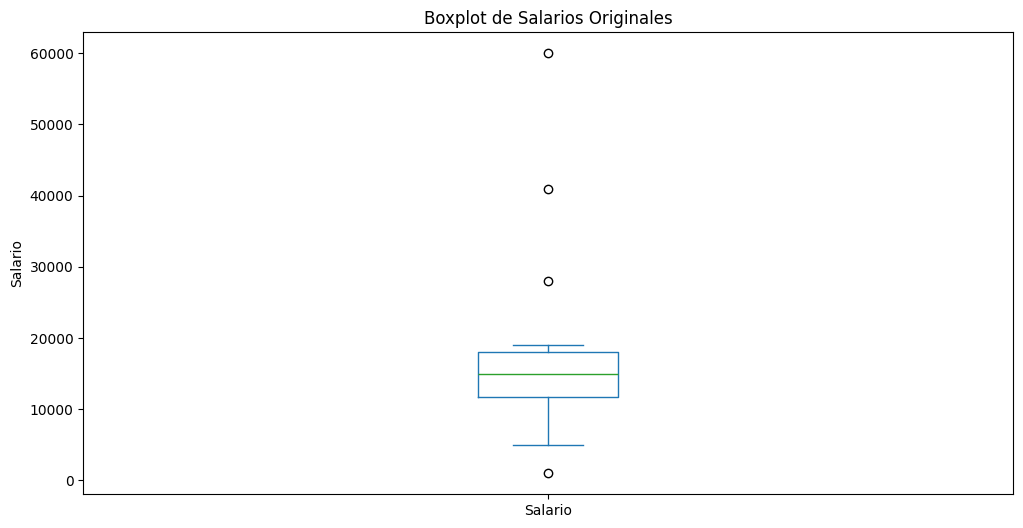

In [12]:
#Previsualizacion inicial 
plt.figure(figsize=(12,6))
df['Salario'].plot(kind='box')
plt.title('Boxplot de Salarios Originales')
plt.ylabel('Salario')
plt.show()

In [13]:
#Comparacion antes y despues cuando se aplican tecnicas 
#Utilizando con los cuartiles IQR
Q1 = df['Salario'].quantile(0.25)
Q3= df['Salario'].quantile(0.75)
#Calculo el rango entrecuartilico
IQR = Q3 - Q1
#Ahora calcular los limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identificar lo outliers
outliers = df[(df['Salario'] < lower_bound) | (df['Salario'] > upper_bound)]
display(outliers)


,ID,Nombre,Edad,Salario,Ciudad,Fecha_Ingreso
1,2,Maria,21,1000,Barcelona,None
3,4,Ana,23,41000,Sevilla,2020-01-04
18,19,Ana,38,28000,Madrid,2020-01-19
19,20,Luis,39,60000,Barcelona,2020-01-20


In [16]:
#Imputacion de los valores atipicos
df['Salario_Capped'] = np.where(
    (df['Salario'] < lower_bound) | (df['Salario'] > upper_bound),
    df['Salario'].mean(),
    df['Salario']
)
display(df[['Salario', 'Salario_Capped']])

,Salario,Salario_Capped
0,5000,5000.0
1,1000,17500.0
2,5000,5000.0
3,41000,17500.0
4,15000,15000.0
5,16000,16000.0
6,17000,17000.0
7,18000,18000.0
8,19000,19000.0
9,10000,10000.0


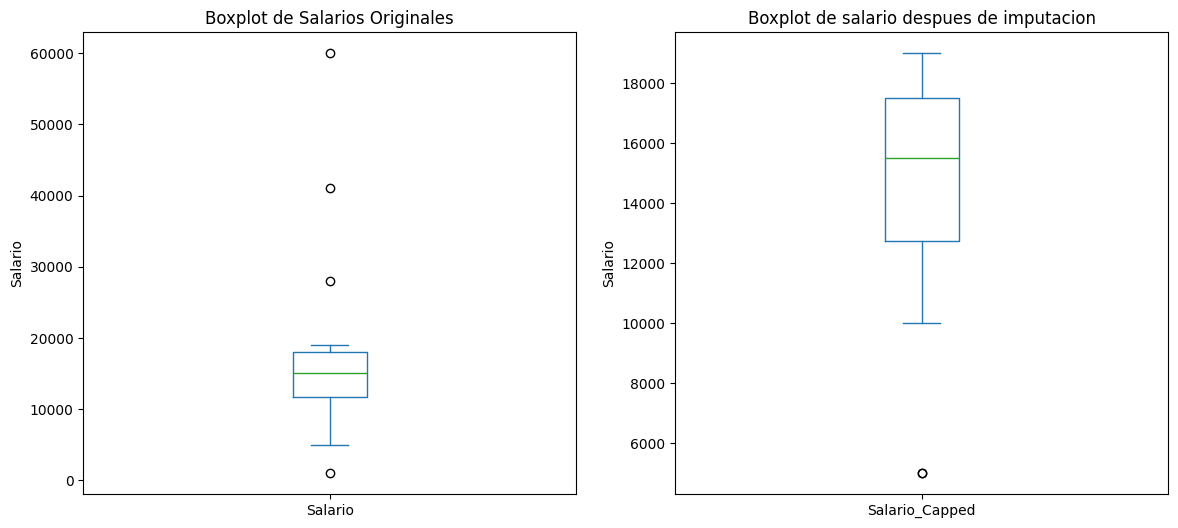

In [17]:
#visualizacion inicial 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Salario'].plot(kind='box')
plt.title('Boxplot de Salarios Originales')
plt.ylabel('Salario')
plt.subplot(1,2,2)
df['Salario_Capped'].plot(kind='box')
plt.title('Boxplot de salario despues de imputacion')
plt.ylabel('Salario')
plt.show()

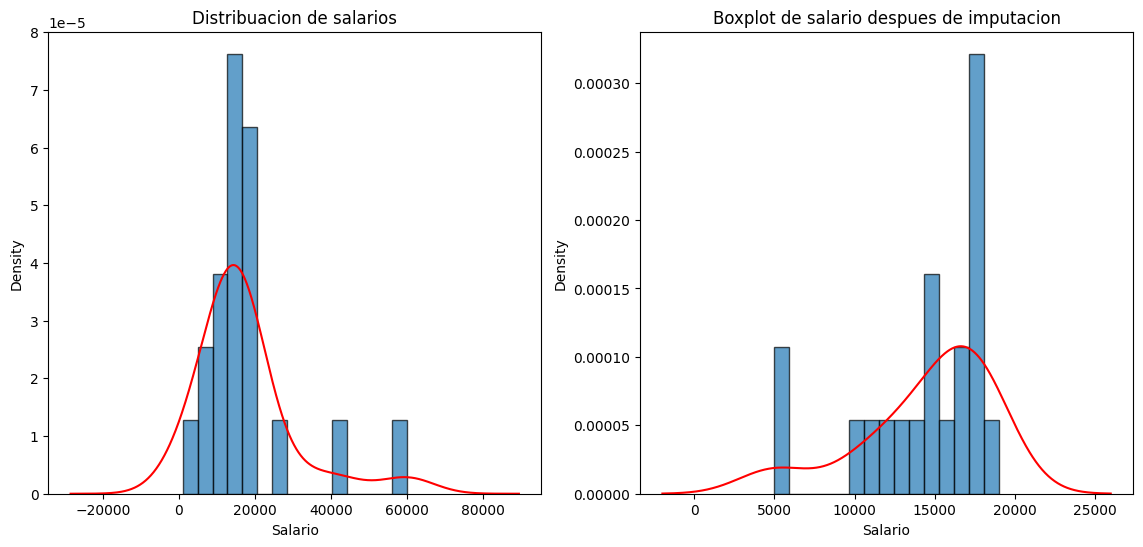

In [20]:
#visualizacion con histograma
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Salario'].plot(kind='hist',bins=15,edgecolor = 'black',density=True,alpha=0.7)
df['Salario'].plot(kind='kde',color='red')
plt.title('Distribuacion de salarios')
plt.xlabel('Salario')
plt.subplot(1,2,2)
df['Salario_Capped'].plot(kind='hist',bins=15,edgecolor = 'black',density=True,alpha=0.7)
df['Salario_Capped'].plot(kind='kde',color='red')
plt.title('Boxplot de salario despues de imputacion')
plt.xlabel('Salario')
plt.show()

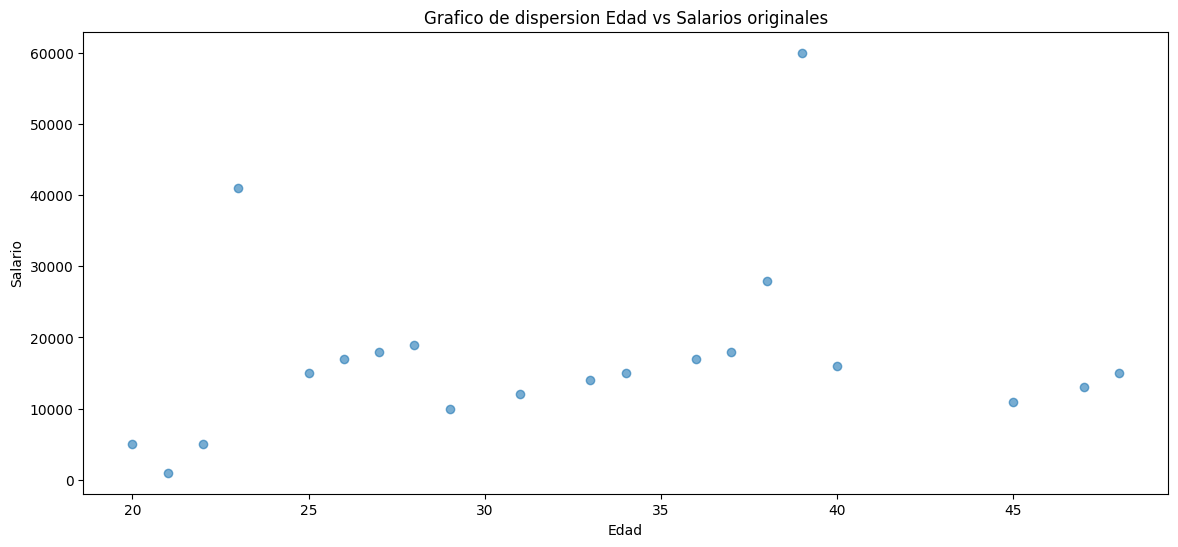

In [21]:
#Graficos de dispersion
plt.figure(figsize=(14,6))
plt.scatter(df['Edad'],df['Salario'],alpha=0.6)
plt.title('Grafico de dispersion Edad vs Salarios originales')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()


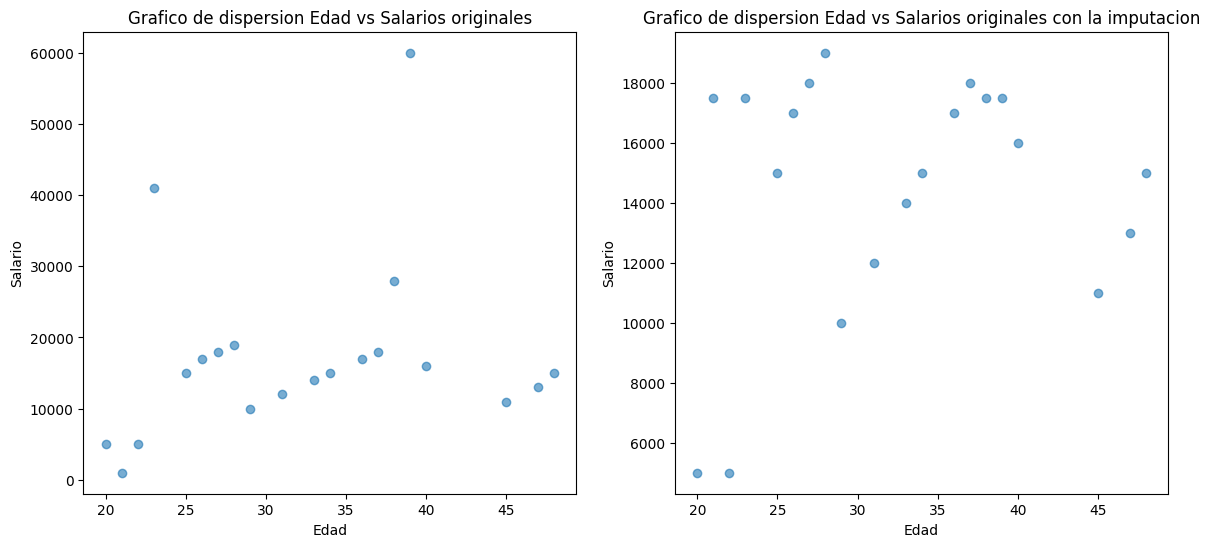

In [22]:
#Comparar los graficos de dispesion
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(df['Edad'],df['Salario'],alpha=0.6)
plt.title('Grafico de dispersion Edad vs Salarios originales')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.subplot(1,2,2)
plt.scatter(df['Edad'],df['Salario_Capped'],alpha=0.6)
plt.title('Grafico de dispersion Edad vs Salarios originales con la imputacion')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()